# Importing necessary librraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns

# Part 1: Airline A

In [2]:
#Loading Airline A yearly operations data
data=pd.read_excel("Aircraft A Operations.xlsx")

In [3]:
#Checking first 5 rows of data
data.head()

,Aircraft Name,Aircraft Type,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202


In [4]:
#Getting information like dtypes, null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Aircraft Name        26 non-null     object
 1   Aircraft Type        26 non-null     object
 2   2014-01-01 00:00:00  26 non-null     int64 
 3   2014-02-01 00:00:00  26 non-null     int64 
 4   2014-03-01 00:00:00  26 non-null     int64 
 5   2014-04-01 00:00:00  26 non-null     int64 
 6   2014-05-01 00:00:00  26 non-null     int64 
 7   2014-06-01 00:00:00  26 non-null     int64 
 8   2014-07-01 00:00:00  26 non-null     int64 
 9   2014-08-01 00:00:00  26 non-null     int64 
 10  2014-09-01 00:00:00  26 non-null     int64 
 11  2014-10-01 00:00:00  26 non-null     int64 
 12  2014-11-01 00:00:00  26 non-null     int64 
 13  2014-12-01 00:00:00  26 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 3.0+ KB


In [5]:
#Calculating total hours flown in a year for each aircraft
data['Hours']=data.sum(axis=1)
data.head()

,Aircraft Name,Aircraft Type,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,Hours
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252,2999
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302,3599
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247,2939
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312,3719
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202,2399


In [6]:
#Gathering useful data
df=pd.concat([data.iloc[:,0:2],data['Hours']],axis=1)
df.head()

,Aircraft Name,Aircraft Type,Hours
0,A,A320,2999
1,B,A330,3599
2,C,B737,2939
3,D,B747,3719
4,E,Q400,2399


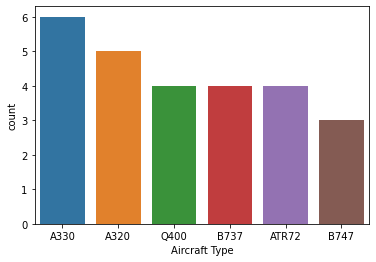

In [7]:
sns.countplot(x='Aircraft Type',data=df,order=df['Aircraft Type'].value_counts().index)
plt.show()

In [8]:
#Grouping by aircraft type & then calculating total hours flown
total_hours_bytype=df.groupby('Aircraft Type')['Hours'].sum().sort_values(ascending=False)
total_hours_bytype

Aircraft Type
A330     21834
A320     14875
B737     11816
B747     11037
ATR72     9536
Q400      9476
Name: Hours, dtype: int64

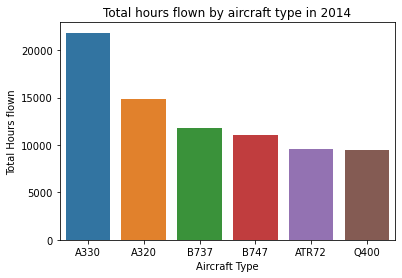

In [9]:
sns.barplot(total_hours_bytype.index,total_hours_bytype)
plt.ylabel("Total Hours flown")
plt.title("Total hours flown by aircraft type in 2014")
plt.show()

In [10]:
#Loading Aircraft Characteristics File
df_characteristics=pd.read_excel("Aircraft A Characteristics.xlsx")
df_characteristics.head()

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour
0,A320,5000,800,150,5000
1,A330,8000,900,250,7500
2,B737,5000,800,150,5100
3,B747,10000,900,350,12000
4,Q400,1500,750,90,3500


In [11]:
#Merging total hours by type obtained above with aircraft characteristics
df_airlineA=pd.merge(df_characteristics,pd.DataFrame(total_hours_bytype),on='Aircraft Type')
#Calculating total cost
df_airlineA['Total Cost']=df_airlineA['Hours']*df_airlineA['Costs per flight hour']
df_airlineA

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Hours,Total Cost
0,A320,5000,800,150,5000,14875,74375000
1,A330,8000,900,250,7500,21834,163755000
2,B737,5000,800,150,5100,11816,60261600
3,B747,10000,900,350,12000,11037,132444000
4,Q400,1500,750,90,3500,9476,33166000
5,ATR72,1000,650,75,2750,9536,26224000


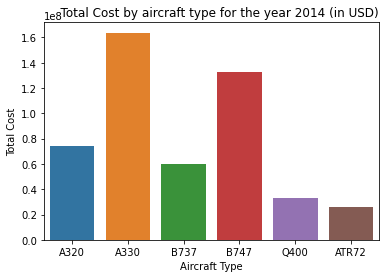

In [12]:
#Plotting total cost (in USD) by aircraft type for the year 2014
sns.barplot(df_airlineA['Aircraft Type'],df_airlineA['Total Cost'])
plt.title("    Total Cost by aircraft type for the year 2014 (in USD)")
plt.show()

In [13]:
#Calculating Cost per seat per km: Cost Factor(CF)
dist=df_airlineA['Hours']*df_airlineA['Ave. Speed (km/h)']
df_airlineA['CF']=df_airlineA['Total Cost']/(dist*df_airlineA['Number of Seats'])
df_airlineA

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Hours,Total Cost,CF
0,A320,5000,800,150,5000,14875,74375000,0.041667
1,A330,8000,900,250,7500,21834,163755000,0.033333
2,B737,5000,800,150,5100,11816,60261600,0.042500
3,B747,10000,900,350,12000,11037,132444000,0.038095
4,Q400,1500,750,90,3500,9476,33166000,0.051852
5,ATR72,1000,650,75,2750,9536,26224000,0.056410


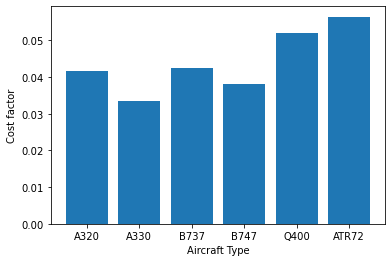

In [14]:
#Plotting cost factor with aircraft type
plt.bar(df_airlineA['Aircraft Type'],df_airlineA['CF'])
plt.xlabel("Aircraft Type")
plt.ylabel("Cost factor")
plt.show()

### A330 has lowest cost per seat per km flown

# Part 2: Airline B

# Approach:
Step 1: Based on the distance between two cities and aircraft range, number of trips to be made was calculated.

Step 2: Based on passenger demand & aircraft capacity, number of trips to be made was calculated.

Step 3: Using required trips obtained from Step 1,2 total trips between two cities was calculated.

Step 4: Assuming 1 trip to take an hour, Cost/hour* Hours(trips) will give total cost.

Step 5: The aircraft which has least cost was chosen appropriate between given city pairs.